# MOVIES & SHOWS

TASKS PERFORMED :
    
Exploratory Data Analysis

Understanding what type content is available in different countries

Is OTT has increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features - TBD

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
import matplotlib.cm as cm
import string



from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.stem.snowball import SnowballStemmer



import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('MOVIES_SHOWS_DATA.csv')

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [10]:
df.shape

(7787, 12)

In [11]:
df.info(memory_usage = 'deep' )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 7.5 MB


In [12]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Data info

In [13]:
import pandas as pd

def DataInfoAll(df):
    
    summary = pd.DataFrame(df.dtypes, columns=['dtypes']).reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name', 'dtypes']]

    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values

    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        unique_values = df[col].unique()[:5]
        summary.loc[summary['Name'] == col, 'Unique Values'] = ', '.join(map(str, unique_values))

    return summary


In [14]:
DataInfoAll(df)

,Name,dtypes,Missing,Uniques,First Value,Second Value,Unique Values
0,show_id,object,0,7787,s1,s2,"s1, s2, s3, s4, s5"
1,type,object,0,2,TV Show,Movie,"TV Show, Movie"
2,title,object,0,7787,3%,7:19,"3%, 7:19, 23:59, 9, 21"
3,director,object,2389,4049,NaN,Jorge Michel Grau,"nan, Jorge Michel Grau, Gilbert Chan, Shane Ac..."
4,cast,object,718,6831,"João Miguel, Bianca Comparato, Michel Gomes, R...","Demián Bichir, Héctor Bonilla, Oscar Serrano, ...","João Miguel, Bianca Comparato, Michel Gomes, R..."
5,country,object,507,681,Brazil,Mexico,"Brazil, Mexico, Singapore, United States, Turkey"
6,date_added,object,10,1565,"August 14, 2020","December 23, 2016","August 14, 2020, December 23, 2016, December 2..."
7,release_year,int64,0,73,2020,2016,NaN
8,rating,object,7,14,TV-MA,TV-MA,"TV-MA, R, PG-13, TV-14, TV-PG"
9,duration,object,0,216,4 Seasons,93 min,"4 Seasons, 93 min, 78 min, 80 min, 123 min"


In [15]:
df_duplicate = df[df.duplicated()]
df_duplicate

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### Null value information 

In [16]:
null_info=df.isnull().sum().reset_index().rename(columns={0: 'NaN values'})
null_info = null_info.sort_values(by='NaN values',ascending=False)
null_info['%age of NaN values'] = (null_info['NaN values'] / len(df)) * 100
null_info

,index,NaN values,%age of NaN values
3,director,2389,30.679337
4,cast,718,9.220496
5,country,507,6.510851
6,date_added,10,0.128419
8,rating,7,0.089893
0,show_id,0,0.000000
1,type,0,0.000000
2,title,0,0.000000
7,release_year,0,0.000000
9,duration,0,0.000000


### Plotting null - Heat Map

<AxesSubplot:>

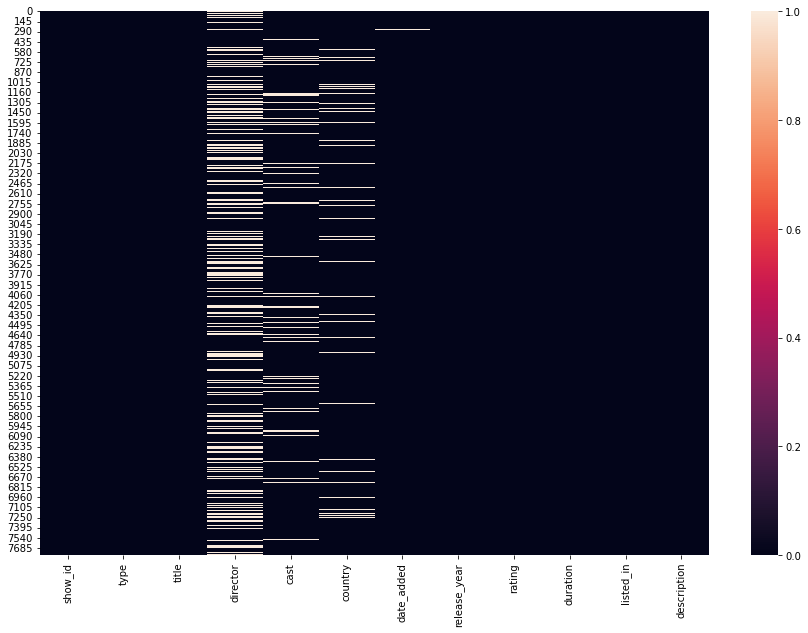

In [17]:
plt_na = df.isna()
plt.figure( figsize = (15 , 10))
sns.heatmap(plt_na)

### Bar plot

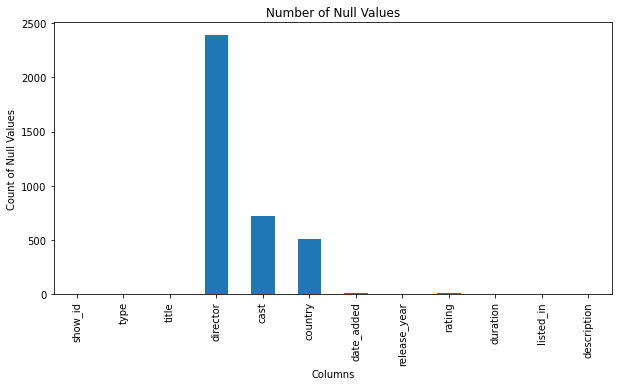

In [18]:
null_counts = df.isnull().sum()
plt.figure(figsize=(10, 5))
null_counts.plot(kind='bar')
plt.title('Number of Null Values')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.show()

Since null values are more for columns : {director,cast} removing those 

In [19]:
df.drop(['director','cast'],axis=1, inplace=True)

In [20]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [21]:
data_added_NaN = df[df['date_added'].isna()]
data_added_NaN.shape

(10, 10)

In [22]:
df.dropna(subset = ['date_added'], inplace = True)

In [23]:
df.shape

(7777, 10)

In [24]:
df.nunique()

show_id         7777
type               2
title           7777
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        491
description     7759
dtype: int64

In [25]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

### Production Growth based on type & release_year  

In [26]:
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

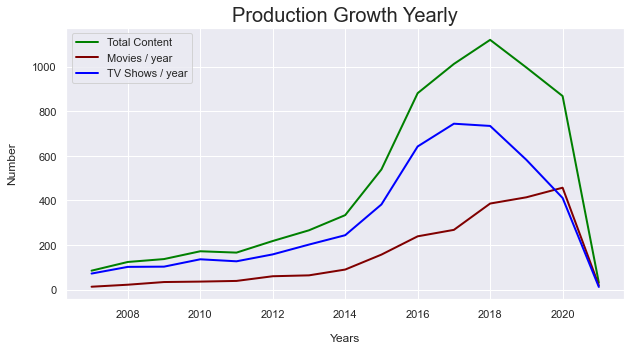

In [27]:
sns.set(font_scale=1)
total_content.plot(figsize=(10, 5), linewidth=2, color='green',label="Total Content ")
yearly_movies.plot(figsize=(10, 5), linewidth=2, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(10, 5), linewidth=2, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1, fontsize=20);

In [28]:
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [29]:
df['release_year'].value_counts().to_frame().T

,2018,2017,2019,2016,2020,2015,2014,2013,2012,2010,...,1969,1963,1954,1970,1956,1925,1964,1966,1947,1959
release_year,1120,1012,996,881,868,539,334,266,218,172,...,2,2,2,2,2,1,1,1,1,1


### Outliers

<AxesSubplot:xlabel='release_year'>

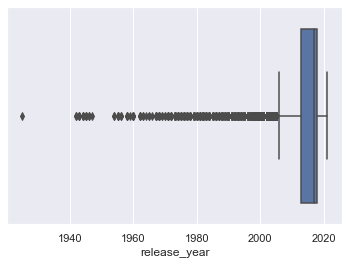

In [30]:
sns.boxplot(df.release_year)

In [31]:
Q1 = df.release_year.quantile(0.25)
Q3 = df.release_year.quantile(0.75)
IQR = Q3 - Q1


In [32]:
Q1

2013.0

In [33]:
Q3

2018.0

In [34]:
IQR

5.0

In [35]:
outliers = df[(df.release_year < (Q1 - 1.5 * IQR)) | ( df.release_year > (Q3 + 1.5 * IQR)) ] 

In [36]:
outliers

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,187,United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
44,s45,Movie,Æon Flux,United States,"February 1, 2018",2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an..."
94,s95,Movie,28 Days,United States,"September 30, 2020",2000,PG-13,104 min,"Comedies, Dramas",After her drunken antics result in property da...
97,s98,Movie,3 Deewarein,NaN,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
105,s106,Movie,300 Miles to Heaven,"Denmark, France, Poland","October 1, 2019",1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br..."
...,...,...,...,...,...,...,...,...,...,...
7745,s7746,Movie,"Yours, Mine and Ours",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
7749,s7750,TV Show,Yu-Gi-Oh!,Japan,"July 8, 2020",2005,TV-Y7,2 Seasons,"Anime Series, Kids' TV",The lives of young Yugi Moto and his friends J...
7754,s7755,Movie,Yuva,India,"March 1, 2018",2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...
7760,s7761,Movie,Zaki Chan,Egypt,"May 19, 2020",2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...


In [37]:
mean = df["release_year"].mean()
mean

2013.935965025074

In [38]:
yb_2009 = df["release_year"] < 2009
yb_2009

0       False
1       False
2       False
3       False
4        True
        ...  
7782     True
7783    False
7784    False
7785    False
7786    False
Name: release_year, Length: 7777, dtype: bool

In [39]:
df.loc[yb_2009, "release_year"] = mean


In [40]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020.000000,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016.000000,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011.000000,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009.000000,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2013.935965,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2013.935965,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,India,"March 2, 2019",2015.000000,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,"September 25, 2020",2019.000000,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019.000000,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


<AxesSubplot:xlabel='release_year'>

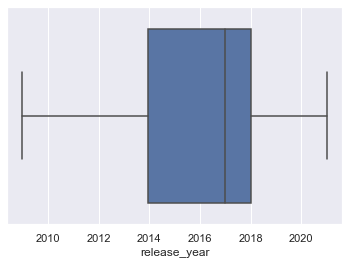

In [41]:
sns.boxplot(df.release_year)

In [42]:
df.release_year = df.release_year.astype("int64")

In [43]:
df.title.nunique()

7777

### Most occured word in title 

In [44]:
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white",font_path="/Users/bandaru.sai/Downloads/dejavu-sans/DejaVuSans.ttf").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: Only supported for TrueType fonts

In [53]:
df.country.nunique()

681

In [54]:
df.country.isna().sum()

506

In [55]:
df.country.value_counts().rename_axis('Country').reset_index(name='counts').T

,0,1,2,3,4,5,6,7,8,9,...,671,672,673,674,675,676,677,678,679,680
Country,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,2549,923,396,225,183,177,134,115,101,100,...,1,1,1,1,1,1,1,1,1,1


In [56]:
df.country.mode()[0]

'United States'

In [57]:
df.country[df.country.isna()] = df.country.mode()[0]

In [58]:
df.country.isna().sum()

0

In [59]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [60]:
production_country[:10]

[('Italy', 90, 23, 67),
 ('Uganda', 1, 0, 1),
 ('', 4, 0, 4),
 ('Ghana', 4, 0, 4),
 ('United Arab Emirates', 34, 1, 33),
 ('Australia', 143, 59, 84),
 ('Vatican City', 1, 0, 1),
 ('Uruguay', 14, 1, 13),
 ('Hungary', 9, 1, 8),
 ('Germany', 199, 42, 157)]

In [61]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)



In [62]:
top_countries=country_df.head()
top_countries.T

,0,1,2,3,4
country,United States,India,United Kingdom,Canada,France
Productions,3797,990,722,412,349
TV-Shows,1136,75,255,126,84
Movies,2661,915,467,286,265


<AxesSubplot:xlabel='country'>

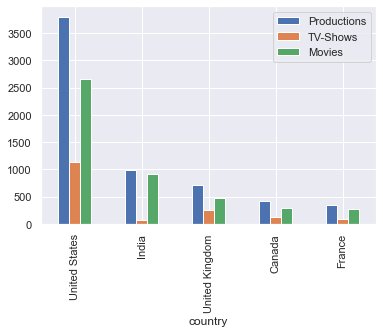

In [63]:
top_countries.plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")

### TYPE

In [64]:
df['type'].value_counts().sort_values()

TV Show    2400
Movie      5377
Name: type, dtype: int64

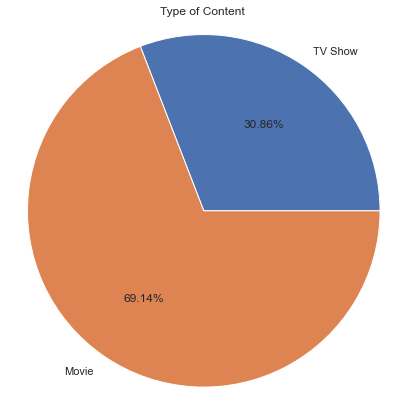

In [65]:
plt.figure(figsize=(7, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,autopct='%1.2f%%')
plt.title('Type of Content')
plt.axis('equal')
plt.show()

### Duration

In [66]:
df.duration.nunique()

216

In [67]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2013,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [68]:
df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,13 Seasons,9 min,182 min,224 min,233 min,191 min
duration,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1



        General assumptions :

            1. average 5 episodes per season.
            2. each episode avg time is 55 mins.
  

#### season to minutes

In [69]:
def convert_seasons_to_min(value):
  
    no_of_avg_episode = 5
    if "Seasons" in value:
        value = value.replace("Seasons",'')
        value = value.replace(" ","")
        total_seasons = int(value)
        each_season_mins = ( no_of_avg_episode * 55 )
        total_mins = (total_seasons * each_season_mins)
        return total_mins
    elif "Season" in value:
        value = value.replace("Season",'')
        value = value.replace(" ","")
        total_mins = (no_of_avg_episode * 55)
        return total_mins

In [70]:
convert_seasons_to_min("4 Seasons")

1100

#### all duration to minutes

In [71]:
def all_the_duration_in_minutes():
    df['duration'] = df.duration.str.replace(" min" , "")
    time_list =[]
    for time in df.duration.values:
        if "Season" in time:
            time = convert_seasons_to_min(time)
        else:
            time = time.replace(" ","")
        time_list.append(time)        
    time_list = [ int(Time) for Time in time_list]
    #print(len(time_list))
    df.duration = time_list 


In [72]:
df.duration.value_counts().to_frame().T

,1 Season,2 Seasons,3 Seasons,90 min,93 min,94 min,91 min,95 min,92 min,97 min,...,193 min,13 min,214 min,8 min,13 Seasons,9 min,182 min,224 min,233 min,191 min
duration,1608,378,183,136,131,125,125,119,118,117,...,1,1,1,1,1,1,1,1,1,1


In [73]:
all_the_duration_in_minutes()

###  **listed_in**

In [74]:
df.listed_in.nunique()

491

In [75]:
df.listed_in.isna().sum()

0

In [76]:
df.listed_in.value_counts().to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
listed_in,334,321,320,243,215,204,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


In [77]:
categories = ", ".join(df['listed_in']).split(", ")
categories

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Action & Adventure',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Dramas',
 'International TV Shows',
 'TV Dramas',
 'TV Mysteries',
 'Horror Movies',
 'International Movies',
 'Dramas',
 'Horror Movies',
 'International Movies',
 'Horror Movies',
 'International Movies',
 'Thrillers',
 'Dramas',
 'Thrillers',
 'Crime TV Shows',
 'International TV Shows',
 'TV Dramas',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 'Documentaries',
 'International Movies',
 'Sports Movies',
 'Independent Movies',
 'Sci-Fi & Fantasy',
 'Thrillers',
 'Dramas',
 'International Movies',
 'Thrillers',
 'International TV Shows',
 'TV Dramas',
 'Dramas',
 'Thrillers',
 'Comedies',
 'Dramas',
 'Independent Movies',
 'Sports Movies',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Action & Adventure',
 'Dramas',
 'International Movies',
 '

In [78]:
len(set(categories))

42

In [79]:
len(categories)

17051

#### so 42 categories occured in total of 17051 times 

In [80]:
category_wise_count = {}
for category in set(categories):
    category_wise_count[category] = categories.count(category)

In [81]:
category_wise_count

{'TV Mysteries': 90,
 'Anime Series': 147,
 'International Movies': 2437,
 'Stand-Up Comedy': 329,
 'Romantic Movies': 531,
 'Docuseries': 352,
 'Documentaries': 786,
 'Sci-Fi & Fantasy': 218,
 "Kids' TV": 412,
 'Children & Family Movies': 532,
 'Anime Features': 57,
 'Science & Nature TV': 85,
 'Classic & Cult TV': 25,
 'Thrillers': 491,
 'TV Thrillers': 50,
 'Korean TV Shows': 150,
 'Comedies': 1471,
 'TV Dramas': 703,
 'TV Sci-Fi & Fantasy': 75,
 'Romantic TV Shows': 333,
 'Independent Movies': 673,
 'British TV Shows': 231,
 'Music & Musicals': 321,
 'Cult Movies': 59,
 'TV Horror': 69,
 'Teen TV Shows': 60,
 'Action & Adventure': 721,
 'Classic Movies': 103,
 'TV Action & Adventure': 149,
 'Spanish-Language TV Shows': 146,
 'LGBTQ Movies': 90,
 'Horror Movies': 312,
 'Crime TV Shows': 426,
 'Sports Movies': 196,
 'TV Comedies': 518,
 'Faith & Spirituality': 57,
 'International TV Shows': 1198,
 'Movies': 56,
 'TV Shows': 12,
 'Dramas': 2106,
 'Reality TV': 222,
 'Stand-Up Comedy &

In [82]:
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])

* Top 5 least occurred category


In [83]:
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('Movies', 56)]

* Top 10 most occurred category


In [84]:
sorted_category_wise_count[-10:]

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1198),
 ('Comedies', 1471),
 ('Dramas', 2106),
 ('International Movies', 2437)]

In [85]:
top10 = sorted_category_wise_count[-10:]
top_10_name = []
top_10_count = []

In [86]:
for i in top10:
    top_10_name.append(i[0])
    top_10_count.append(i[1])

<Figure size 864x864 with 0 Axes>

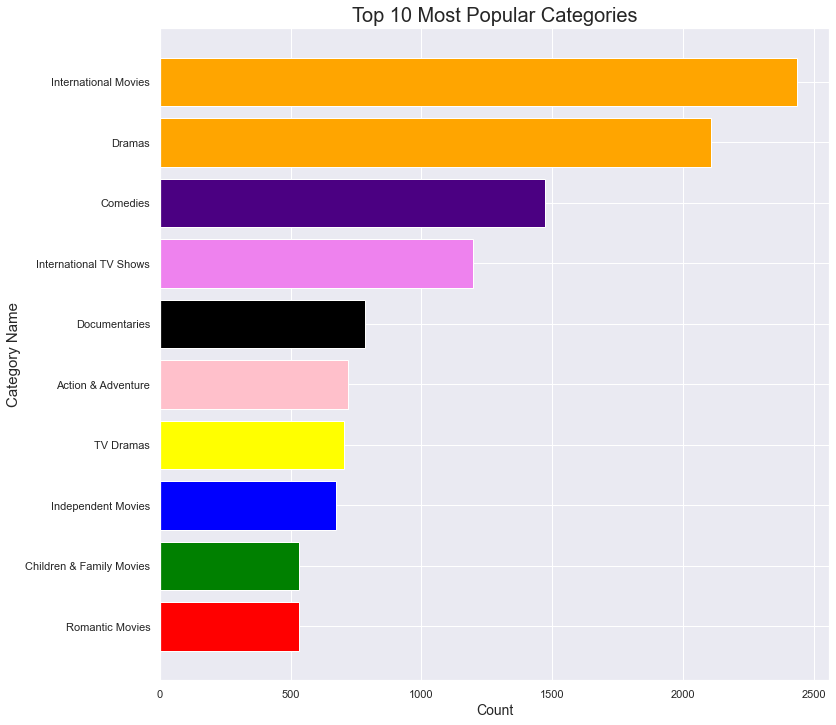

<Figure size 864x864 with 0 Axes>

In [87]:
plt.figure( figsize = (12,12))
color=['red', 'green', 'blue', 'yellow', 'pink' , "black" ,'violet', 'indigo', 'orange', 'orange']
plt.barh(top_10_name , top_10_count , color= color)
plt.title("Top 10 Most Popular Categories",fontsize = 20)
plt.xlabel("Count", fontsize = 14 )
plt.ylabel("Category Name" , fontsize = 15 )
plt.figure( figsize = (12,12))

In [88]:
no_of_category = []
for categories in df.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)
df['no_of_category'] = no_of_category

In [89]:
df[['listed_in' , 'no_of_category']]

,listed_in,no_of_category
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
1,"Dramas, International Movies",2
2,"Horror Movies, International Movies",2
3,"Action & Adventure, Independent Movies, Sci-Fi...",3
4,Dramas,1
...,...,...
7782,"Dramas, International Movies",2
7783,"Dramas, International Movies, Music & Musicals",3
7784,"Documentaries, International Movies, Music & M...",3
7785,"International TV Shows, Reality TV",2


In [90]:
df.no_of_category.unique()

array([3, 2, 1])

In [91]:
df.no_of_category.value_counts()

3    3295
2    2684
1    1798
Name: no_of_category, dtype: int64

Text(0, 0.5, 'Count')

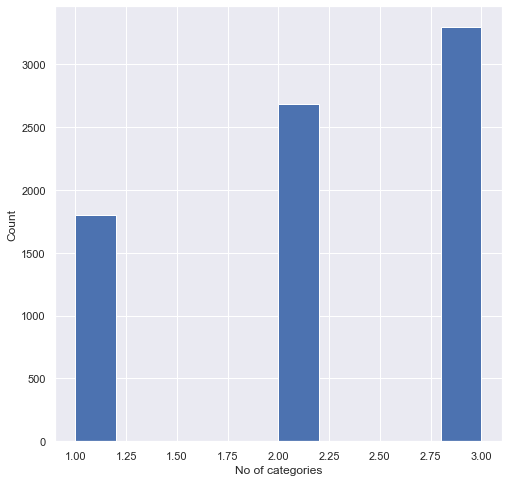

In [92]:
sns.set(style="darkgrid")
plt.figure(figsize = (8,8))
plt.hist(df.no_of_category)
plt.xlabel("No of categories")
plt.ylabel("Count")

* Date Added

In [93]:
df.date_added.head()

0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
3    November 16, 2017
4      January 1, 2020
Name: date_added, dtype: object

In [94]:
df['date_added_month'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df[['date_added' , 'date_added_month']].head()

,date_added,date_added_month
0,"August 14, 2020",August
1,"December 23, 2016",December
2,"December 20, 2018",December
3,"November 16, 2017",November
4,"January 1, 2020",January


In [95]:
month_df=df['date_added_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Count'}, inplace=True)
month_df

,Month_Name,date_added_month
0,December,817
1,October,780
2,January,746
3,November,730
4,March,661
5,September,614
6,August,612
7,April,596
8,July,592
9,June,538


In [96]:
ab = month_df.loc[0:11]
ab

,Month_Name,date_added_month
0,December,817
1,October,780
2,January,746
3,November,730
4,March,661
5,September,614
6,August,612
7,April,596
8,July,592
9,June,538


In [97]:
month_names = ab.Month_Name.values
month_count = ab.date_added_month.values

Text(0, 0.5, 'Count')

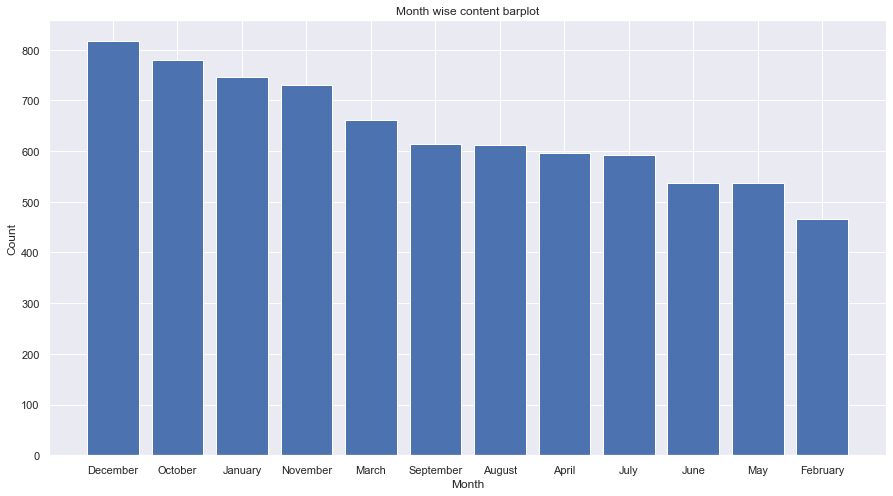

In [98]:
plt.figure(figsize = (15 ,8 ))
plt.bar(month_names , month_count)
plt.title("Month wise content barplot")
plt.xlabel("Month")
plt.ylabel("Count")

### Most popular rating Movies & Tv shows 

In [99]:
df_tv_show = df[df['type']== 'TV Show' ]
df_tv_show.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
5,s6,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,275,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,3,July
11,s12,TV Show,1983,"Poland, United States","November 30, 2018",2018,TV-MA,275,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",3,November
12,s13,TV Show,1994,Mexico,"May 17, 2019",2019,TV-MA,275,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,3,May
16,s17,TV Show,Feb-09,United States,"March 20, 2019",2018,TV-14,275,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2,March


In [100]:
df.rating.value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

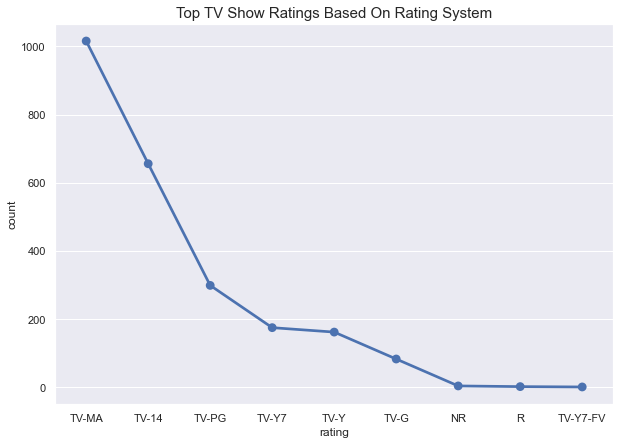

In [101]:
tv_ratings = df_tv_show.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='15')
plt.show()

In [102]:
df_movies = df[df['type'] == 'Movie' ]
df_movies.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,January
6,s7,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2,June


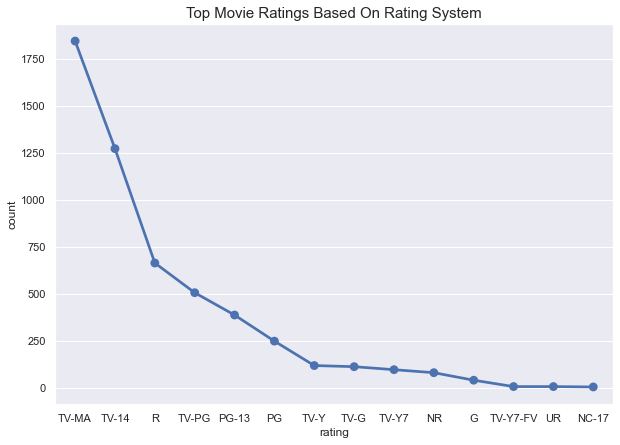

In [103]:
tv_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='15')
plt.show()

                       
                       
                       So overall most of the contents got ratings like
                        * TV-MA 
                        * TV-14 
                        * TV-PG
                        
                        

## Data Preparation

In [104]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [105]:
df['description'] = df['description'].apply(remove_punctuation)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,A brilliant group of students become cardcount...,1,January


In [109]:
sw = nltk.corpus.stopwords.words('english')
for i in sw:
    print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [110]:
len(sw)

179

In [111]:
def remove_stopwords(text):    
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text1)

In [112]:
df['description'] = df['description'].apply( remove_stopwords )
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,brilliant group students become cardcounting e...,1,January


In [115]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(df['description'])
dictionary = count_vectorizer.vocabulary_.items()

In [116]:
dictionary

dict_items([('future', 7153), ('elite', 5642), ('inhabit', 8945), ('island', 9221), ('paradise', 12668), ('far', 6398), ('crowded', 4230), ('slums', 16086), ('get', 7349), ('one', 12297), ('chance', 3060), ('join', 9439), ('saved', 15190), ('squalor', 16502), ('devastating', 4825), ('earthquake', 5491), ('hits', 8306), ('mexico', 11098), ('city', 3326), ('trapped', 17904), ('survivors', 17050), ('walks', 18862), ('life', 10168), ('wait', 18839), ('rescued', 14507), ('trying', 18046), ('desperately', 4778), ('stay', 16611), ('alive', 781), ('army', 1222), ('recruit', 14227), ('found', 6937), ('dead', 4492), ('fellow', 6524), ('soldiers', 16211), ('forced', 6873), ('confront', 3780), ('terrifying', 17426), ('secret', 15378), ('thats', 17480), ('haunting', 8010), ('jungle', 9534), ('training', 17861), ('camp', 2751), ('postapocalyptic', 13347), ('world', 19299), ('ragdoll', 13946), ('robots', 14833), ('hide', 8185), ('fear', 6477), ('dangerous', 4419), ('machines', 10525), ('exterminate',

In [119]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
    vocab.append( key )
    count_of_vocab.append( value )

In [122]:
vocab_before_stemming = pd.DataFrame({"Word": vocab ,"count" :count_of_vocab})
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [123]:
vocab_before_stemming

,Word,count
18855,şeref,19593
10390,ōarai,19592
12377,łukasz,19591
11101,überelite,19590
11673,über,19589
...,...,...
8319,1000,4
639,100,3
7616,10,2
7962,009,1


In [125]:
top15_most_ocurred_vacab = vocab_before_stemming.head(15)
top15_most_occurred_words = top15_most_ocurred_vacab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [126]:
top15_most_occurred_words_count = top15_most_ocurred_vacab['count'].values 
top15_most_occurred_words_count

array([19593, 19592, 19591, 19590, 19589, 19588, 19587, 19586, 19585,
       19584, 19583, 19582, 19581, 19580, 19579])

<BarContainer object of 15 artists>

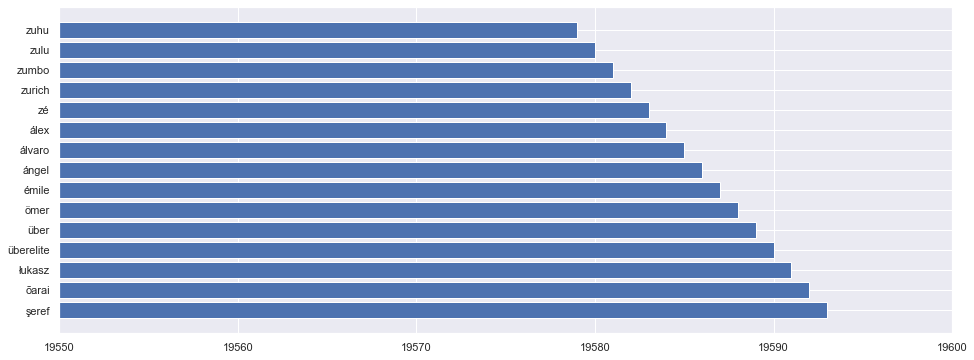

In [131]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(19550, 19600)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

In [134]:
stemmer = SnowballStemmer("english")

In [135]:
def Apply_stemming(text):    
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [136]:
df['description'] = df['description'].apply( Apply_stemming )
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,brilliant group student becom cardcount expert...,1,January


In [137]:
tfid_vectorizer = TfidfVectorizer()
tfid_vectorizer.fit(df['description'])
dictionary = tfid_vectorizer.vocabulary_.items()

In [138]:
dictionary

dict_items([('futur', 5120), ('elit', 4104), ('inhabit', 6479), ('island', 6648), ('paradis', 9343), ('far', 4577), ('crowd', 3135), ('slum', 11667), ('get', 5273), ('one', 9068), ('chanc', 2358), ('join', 6830), ('save', 11024), ('squalor', 11975), ('devast', 3534), ('earthquak', 3994), ('hit', 6028), ('mexico', 8135), ('citi', 2565), ('trap', 12960), ('survivor', 12363), ('walk', 13678), ('life', 7419), ('wait', 13666), ('rescu', 10542), ('tri', 12989), ('desper', 3506), ('stay', 12057), ('aliv', 632), ('armi', 972), ('recruit', 10386), ('found', 4957), ('dead', 3330), ('fellow', 4667), ('soldier', 11765), ('forc', 4910), ('confront', 2855), ('terrifi', 12633), ('secret', 11154), ('that', 12664), ('haunt', 5804), ('jungl', 6901), ('train', 12940), ('camp', 2132), ('postapocalypt', 9818), ('world', 13996), ('ragdol', 10205), ('robot', 10735), ('hide', 5947), ('fear', 4636), ('danger', 3276), ('machin', 7697), ('extermin', 4487), ('brave', 1844), ('newcom', 8727), ('group', 5564), ('br

In [139]:
vocab = []
count_of_vocab = []
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [140]:
vocab_after_stemming = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [141]:
top15_most_ocurred_vocab = vocab_after_stemming.head(15)
top15_most_occurred_words = top15_most_ocurred_vacab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [142]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values 
top15_most_occurred_words_count

array([14240, 14239, 14238, 14237, 14236, 14235, 14234, 14233, 14232,
       14231, 14230, 14229, 14228, 14227, 14226])

<BarContainer object of 15 artists>

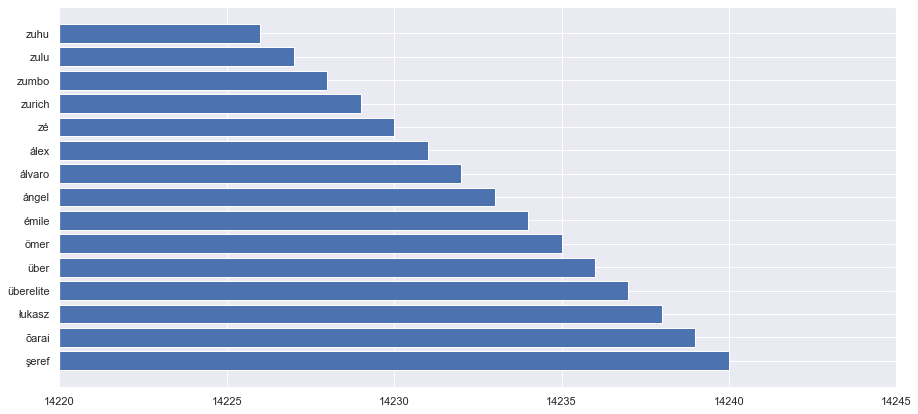

In [146]:
plt.figure( figsize = ( 15,7 ))
plt.xlim(14220, 14245)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )